In [ ]:
# 环境配置

# 安装框架-Linux
# ! conda install pytorch==1.10.0 torchvision==0.11.0 torchaudio==0.10.0 cudatoolkit=11.3 -c pytorch -c conda-forge
# ! pip install https://storage.googleapis.com/tensorflow/linux/gpu/tensorflow_gpu-2.6.0-cp38-cp38-manylinux2010_x86_64.whl

# 安装框架-Windows
# ! conda install pytorch==1.10.0 torchvision==0.11.0 torchaudio==0.10.0 cudatoolkit=11.3 -c pytorch -c conda-forge
! conda install -c conda-forge tensorflow-gpu

In [ ]:
# 检测Pytorch框架，显示True则为通过

import torch

print(torch.__version__)
print(torch.cuda.is_available())

In [ ]:
# 检测Tensorflow环境，显示True则为通过

import tensorflow as tf

tf.test.is_gpu_available(cuda_only=False, min_cuda_compute_capability=None)

In [ ]:
# 安装其它包
%pip install -r requirements.txt -i https://pypi.tuna.tsinghua.edu.cn/simple

D:/LSGL_test/user\M0X@@0TRW_P7L}K7PMH}[7Y.png
分割完成
遮罩处理完成
文件夹已存在


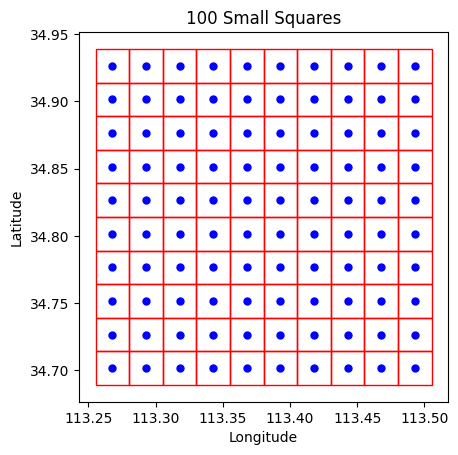

无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
28
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
37
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
46
无街景
48
无街景
无街景
无街景
52
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
无街景
目标匹配完成
目标匹配完成
目标匹配完成
目标匹配完成
目标匹配完成


In [6]:
# 添加sys路径
import sys
sys.path.append('./LSGL/LoFTR')

# 使用Huggingface模型
import LSGL.LoFTR as LoFTR
import LSGL.hgmod as hgmod
import LSGL.maskprocess as mp
import LSGL.conver as conver
import StreetView.Block as Block
import StreetView.spider as spider
import glob
import os

# 执行科学加速
# ! export http_proxy=http://172.181.217.43:12798 && export https_proxy=http://172.181.217.43:12798

# 设定参数

# 获取影像的中心
center = (113.380353386,34.8141059127)
# 网格边长
length = 0.25
# 坐标结果输出
csv_file = 'D:/LSGL_test/test1/coor/coordinates.csv'
# 数据输出
data_outpath = 'D:/LSGL_test/resource'
# 用户影像输入路径
# img_inppath = 'db_upload/'
img_inppath = r'D:/LSGL_test/user'
# 用户影像输出路径
# img_outpath = 'database_img/'
mask_outpath = 'D:/LSGL_test/tmp'
# 匹配结果输出路径
res_path = 'D:/LSGL_test/res'
# 环境
envir = 'windows' # or 'linux'

# 针对不同环境处理路径
paths = [img_inppath, mask_outpath, res_path]
img_inppath, mask_outpath, res_path = conver.path(paths, envir)

# 设定处理模型
segmodel = 'maskformer-swin-large-ade'
# segmodel = 'maskformer-swin-tiny-ade'
# segmodel = 'maskformer-swin-large-coco'

# 调用分割模型
inp_imgs = glob.glob(os.path.join(img_inppath + '*.png'))
for userimage in inp_imgs:
    print(userimage)
    userimage = hgmod.Unipath(userimage)
    hgmod.imagesegment(userimage,mask_outpath,segmodel)
    hgmod.release_memory

# 检查场景类型
# mp.imgscene(mask_outpath)
# 处理遮罩
mp.proceed(mask_outpath, img_inppath, segmodel)

# 爬取街景并进行匹配
for i in range(1):
    data_outpath_tmp = data_outpath + '/' + str(i) + '/'
    res_path = res_path + '/' + str(i) + '/'

    # 提取小格
    if i >= 1:
        length = length / 10

    Block.Cut(center, length, csv_file)
    spider.getPic(data_outpath_tmp, csv_file)

    # 检查是否有跑出结果
    if Block.chekres(data_outpath_tmp) == 0:
        print('已到达最小层级')
        break

    # 调用LoFTR匹配计算
    LoFTR.process(img_inppath, data_outpath_tmp, res_path, mask_outpath)
    LoFTR.rating(res_path)
    ### 目前写到根据最优结果的坐标进入下一轮循环（还没写）

In [2]:
import StreetView.Block as Block
import StreetView.spider as spider

# center = (113.380353386,34.8141059127)
# length = 0.25
# csv_file = 'D:/LSGL_test/test1/coordinates.csv'
path = 'D:/LSGL_test/resource/downloadPic'
# Block.Cut(center, length, csv_file)
# spider.getPic('D:/LSGL_test/resource', csv_file)
print(Block.chekres(path))

0
